<a href="https://colab.research.google.com/github/Raynould-Joseph/Computer-Vision/blob/main/Lab_7_Illustrate_Wavelet_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# importing OpenCV(cv2) module
import numpy as np
import cv2
import imutils


In [ ]:



 # Read RGB image
from google.colab.patches import cv2_imshow
# #for black and white images we must have to addd 0 to he imreadfie
# img = cv2.imread("/content/sample_data/.jpg",0)

img = imread("/content/sample_data/.jpg",0);
figure;
imshow(img)

[xaR, xhR, xvR, xdR] = dwt2(img(:,:,1), 'haar');
[xaG, xhG, xvG, xdG] = dwt2(img(:,:,2), 'haar');
[xaB, xhB, xvB, xdB] = dwt2(img(:,:,3), 'haar');

xa(:,:,1) = xaR; xa(:,:,2) = xaG; xa(:,:,3) = xaB;
xh(:,:,1) = xhR; xa(:,:,2) = xhG; xa(:,:,3) = xhB;
xv(:,:,1) = xvR; xa(:,:,2) = xvG; xa(:,:,3) = xvB;
xd(:,:,1) = xdR; xd(:,:,2) = xdG; xd(:,:,3) = xdB;

xA = xa/255;

figure, imshow(xA*0.3);
figure, imshow(log10(xh)*0.3);
figure, imshow(log10(xv)*0.3);
figure, imshow(log10(xd)*0.3);

% Apply DWT on each of the partial components above
[xaaR, xhhR, xvvR, xddR] = dwt2(xa(:,:,1), 'haar');
[xaaG, xhhG, xvvG, xddG] = dwt2(xa(:,:,2), 'haar');
[xaaB, xhhB, xvvB, xddB] = dwt2(xa(:,:,3), 'haar');

xaa(:,:,1) = xaaR; xaa(:,:,2) = xaaG; xaa(:,:,3) = xaaB;
xhh(:,:,1) = xhhR; xaa(:,:,2) = xhhG; xhh(:,:,3) = xhhB;
xvv(:,:,1) = xvvR; xvv(:,:,2) = xvvG; xvv(:,:,3) = xvvB;
xdd(:,:,1) = xddR; xdd(:,:,2) = xddG; xdd(:,:,3) = xddB;

xAA = xaa/255;

figure, imshow(xAA*0.3);
figure, imshow(log10(xhh)*0.5);
figure, imshow(log10(xvv)*0.5);
figure, imshow(log10(xdd)*0.5);

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Raynould.jpg to Raynould.jpg


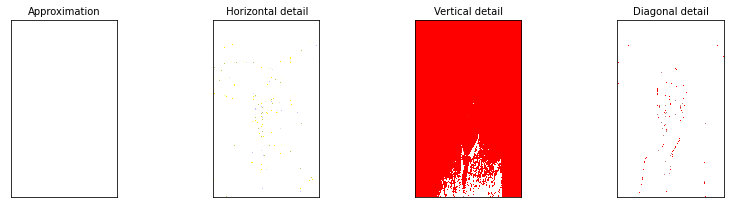

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import cv2


# Load image
original = cv2.imread("Raynould.jpg",cv2.IMREAD_COLOR)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


In [3]:
from google.colab import files
uploaded = files.upload()

Saving personinsun.jpg to personinsun.jpg


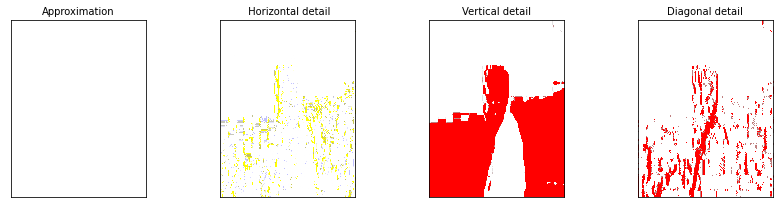

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import cv2


# Load image
original = cv2.imread("personinsun.jpg",cv2.IMREAD_COLOR)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


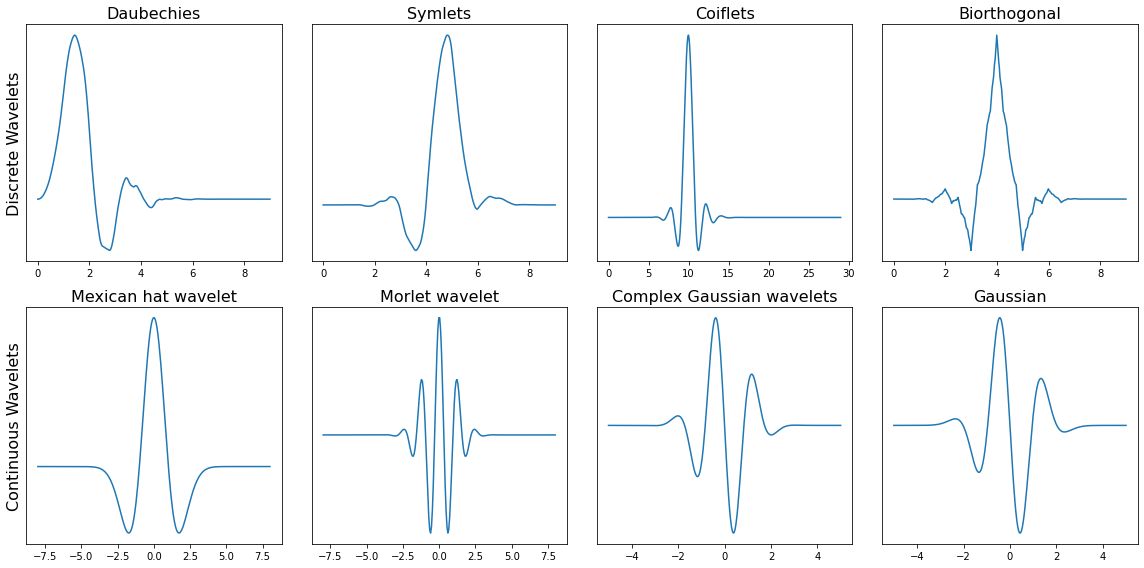

In [5]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()